In [91]:
import cv2
import numpy as np
import os

def compute_similarity(frame1, frame2):
    hsv1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
    hsv2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 100, 100])
    upper_green = np.array([85, 255, 255])
    mask1 = cv2.inRange(hsv1, lower_green, upper_green)
    mask2 = cv2.inRange(hsv2, lower_green, upper_green)
    intersection = cv2.bitwise_and(mask1, mask2)
    similarity = np.sum(intersection) / (np.sum(mask1) + np.sum(mask2) - np.sum(intersection))
    return similarity

def filter_video(video_path, ref_frame_path, output_path, threshold=0.95):
    cap = cv2.VideoCapture(video_path)
    ref_frame = cv2.imread(ref_frame_path)

    if ref_frame is None:
        print("Error: Could not load reference frame.")
        return

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frame_count = 0
    processed_frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        similarity = compute_similarity(ref_frame, frame)
        if similarity >= threshold:
            out.write(frame)
            processed_frame_count += 1

        print(f"Frame {frame_count}: Similarity {similarity:.2f} - {'Kept' if similarity >= threshold else 'Filtered out'}")

        frame_count += 1

    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"Processed {frame_count} frames, kept {processed_frame_count} frames.")

video_path = '/content/WSC_trimed.mp4'
ref_frame_path = '/content/WSC sample.png'
output_path = '/content/WSC_filtered.mp4'
filter_video(video_path, ref_frame_path, output_path)


Streaming output truncated to the last 5000 lines.
Frame 92201: Similarity 0.00 - Filtered out
Frame 92202: Similarity 0.00 - Filtered out
Frame 92203: Similarity 0.00 - Filtered out
Frame 92204: Similarity 0.00 - Filtered out
Frame 92205: Similarity 0.00 - Filtered out
Frame 92206: Similarity 0.00 - Filtered out
Frame 92207: Similarity 0.00 - Filtered out
Frame 92208: Similarity 0.00 - Filtered out
Frame 92209: Similarity 0.00 - Filtered out
Frame 92210: Similarity 0.00 - Filtered out
Frame 92211: Similarity 0.00 - Filtered out
Frame 92212: Similarity 0.00 - Filtered out
Frame 92213: Similarity 0.00 - Filtered out
Frame 92214: Similarity 0.00 - Filtered out
Frame 92215: Similarity 0.00 - Filtered out
Frame 92216: Similarity 0.00 - Filtered out
Frame 92217: Similarity 0.00 - Filtered out
Frame 92218: Similarity 0.00 - Filtered out
Frame 92219: Similarity 0.00 - Filtered out
Frame 92220: Similarity 0.00 - Filtered out
Frame 92221: Similarity 0.00 - Filtered out
Frame 92222: Similarity 0

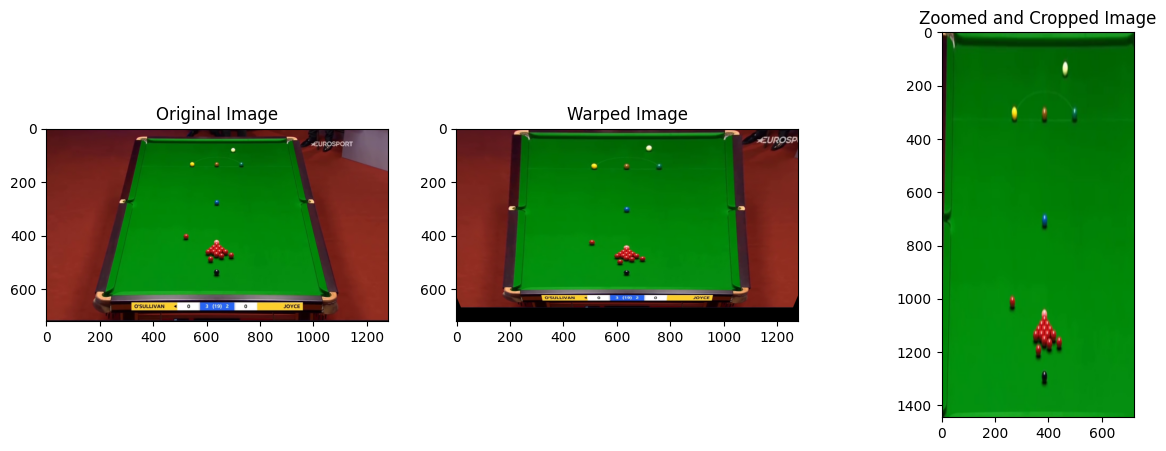

In [92]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Given 2D correspondences
uv = np.array([[253, 608], [1027, 608], [904,  47], [376,  47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]])

# Defining the target coordinates (for perpendicular view)
# Assuming a new coordinate system where the table is seen from above
uv_projected = np.array([[253, 608], [1027, 608], [1027, 47], [253, 47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]])

# Calculating the homography matrix
H, _ = cv2.findHomography(uv, uv_projected)

# Load the image
image_path = "/content/WSC sample.png"
image = cv2.imread(image_path)

# Warp the image using the homography matrix
warped_image = cv2.warpPerspective(image, H, (image.shape[1], image.shape[0]))

# Crop the image from x=200 to x=1100 and y=0 to y=1200
x_start, x_end = 225, 1000
y_start, y_end = 20, 600
cropped_warped_image = warped_image[y_start:y_end, x_start:x_end]

# Resize to the specified dimensions (720x1445)
zoomed_image = cv2.resize(cropped_warped_image, (720, 1445), interpolation=cv2.INTER_LINEAR)

# Save the zoomed image
output_path = "/content/WSC_sample_zoomed.png"
cv2.imwrite(output_path, zoomed_image)

# Plot the original, warped, and zoomed images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Warped Image")
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title("Zoomed and Cropped Image")
plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))

plt.show()


zoomed_image_saved = cv2.imread(output_path)



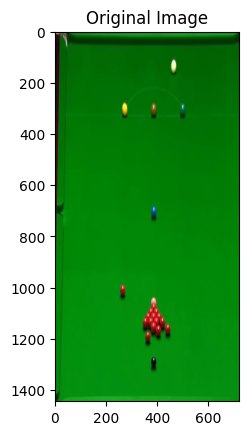

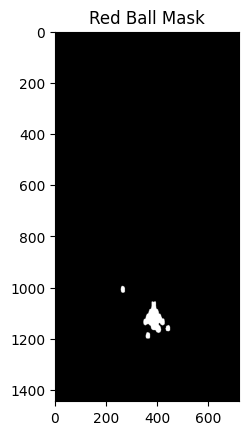

Red balls detected: [(361, 1188, 12), (439, 1160, 12), (390, 1117, 62), (264, 1008, 13)]


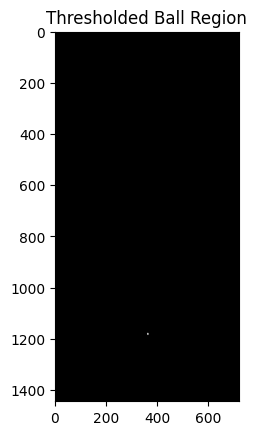

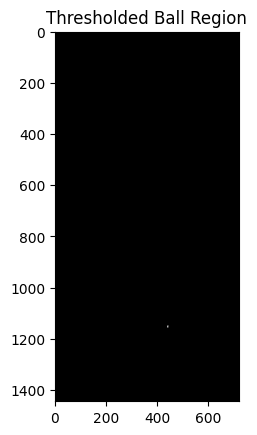

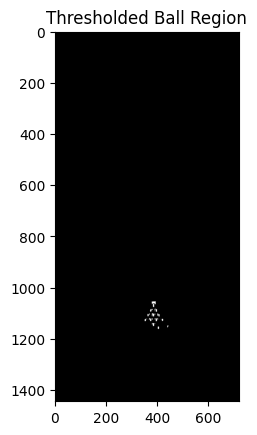

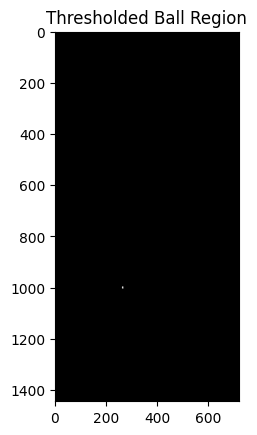

Highlights detected: [(360, 1182), (438, 1153), (402, 1158), (438, 1152), (388, 1142), (382, 1145), (377, 1143), (417, 1127), (351, 1128), (372, 1127), (356, 1123), (388, 1123), (378, 1124), (399, 1123), (393, 1127), (366, 1123), (361, 1108), (404, 1109), (398, 1106), (388, 1105), (381, 1107), (367, 1105), (372, 1090), (393, 1090), (378, 1086), (388, 1086), (383, 1071), (384, 1060), (263, 1001)]


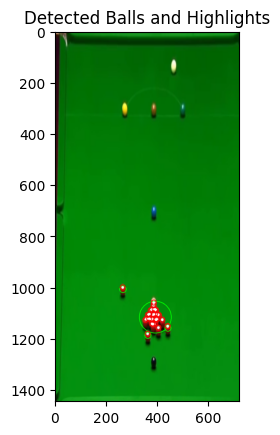

Reconstructed Ball Positions: [(360, 1182), (438, 1153), (402, 1158), (438, 1152), (388, 1142), (382, 1145), (377, 1143), (417, 1127), (351, 1128), (372, 1127), (356, 1123), (388, 1123), (378, 1124), (399, 1123), (393, 1127), (366, 1123), (361, 1108), (404, 1109), (398, 1106), (388, 1105), (381, 1107), (367, 1105), (372, 1090), (393, 1090), (378, 1086), (388, 1086), (383, 1071), (384, 1060), (263, 1001)]


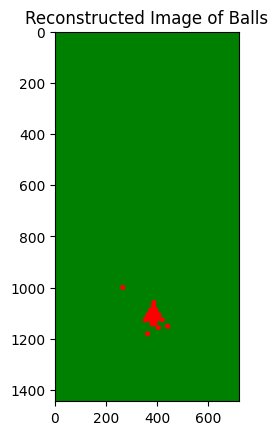

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def find_red_balls(image):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for red color in HSV space
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    # Create masks for the red color ranges
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine both masks
    mask = cv2.bitwise_or(mask1, mask2)

    # Apply morphological operations to remove noise and fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Debug: Display the mask
    plt.figure()
    plt.imshow(mask, cmap='gray')
    plt.title('Red Ball Mask')
    plt.show()

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    balls = []
    for contour in contours:
        # Get the minimum enclosing circle
        ((x, y), radius) = cv2.minEnclosingCircle(contour)

        if radius > 5:  # Filter out small circles that are not likely to be balls
            balls.append((int(x), int(y), int(radius)))

    return balls

def find_highlights(image, balls):
    highlights = []
    for (x, y, radius) in balls:
        # Create a mask for the ball region
        mask = np.zeros(image.shape[:2], dtype="uint8")
        cv2.circle(mask, (x, y), radius, 255, -1)

        # Extract the ball region
        ball_region = cv2.bitwise_and(image, image, mask=mask)

        # Convert the ball region to HSV
        hsv_ball_region = cv2.cvtColor(ball_region, cv2.COLOR_BGR2HSV)

        # Use the fifth plot thresholding method
        _, thresh = cv2.threshold(hsv_ball_region[:,:,2], 220, 255, cv2.THRESH_BINARY)

        # Debug: Display the thresholded image
        plt.figure()
        plt.imshow(thresh, cmap='gray')
        plt.title('Thresholded Ball Region')
        plt.show()

        # Find contours of the white regions
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                highlights.append((cX, cY))

    return highlights

# Define parameters for ball position reconstruction
l_z = 5.5  # Average height of the lights
c_z = 1.5  # Estimated height of the camera
c_x = 0    # Assuming camera is centered horizontally
c_y = 0    # Assuming camera is centered vertically

def reconstruct_ball_position(highlight_positions, l_z, c_x, c_y, c_z):
    ball_positions = []
    for pos in highlight_positions:
        x, y = pos
        b_x = x  # Approximate the ball's x position as the highlight's x position
        b_y = y  # Approximate the ball's y position as the highlight's y position
        ball_positions.append((b_x, b_y))
    return ball_positions

def reconstruct_image(ball_positions, image_size):
    reconstructed_image = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)
    reconstructed_image[:] = (0, 128, 0)  # Set the background to green
    for (x, y) in ball_positions:
        cv2.circle(reconstructed_image, (x, y), 10, (0, 0, 255), -1)  # Draw red balls
    return reconstructed_image

# Example usage
image_path = '/content/WSC_sample_zoomed.png'
if not os.path.exists(image_path):
    print(f"Error: The file at {image_path} does not exist.")
else:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Failed to load the image at {image_path}.")
    else:
        # Display the original image
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.show()

        # Detect the red balls
        balls = find_red_balls(image)
        if not balls:
            print("No red balls detected.")
        else:
            print("Red balls detected:", balls)

            # Detect the highlights within the red balls
            highlights = find_highlights(image, balls)
            if not highlights:
                print("No highlights detected.")
            else:
                print("Highlights detected:", highlights)

                # Draw the detected balls and highlights
                for (x, y, radius) in balls:
                    cv2.circle(image, (x, y), radius, (0, 255, 0), 2)

                for (hx, hy) in highlights:
                    cv2.circle(image, (hx, hy), 5, (255, 255, 255), -1)
                    cv2.circle(image, (hx, hy), 10, (0, 0, 255), 2)  # Circle the highlight with a larger circle for visibility

                # Display the result
                plt.figure()
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title('Detected Balls and Highlights')
                plt.show()

                # Reconstruct ball positions
                ball_positions = reconstruct_ball_position(highlights, l_z, c_x, c_y, c_z)
                print("Reconstructed Ball Positions:", ball_positions)

                # Reconstruct the image based on ball positions
                image_size = image.shape[:2]
                reconstructed_image = reconstruct_image(ball_positions, image_size)

                # Display the reconstructed image
                plt.figure()
                plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
                plt.title('Reconstructed Image of Balls')
                plt.show()


In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Given 2D correspondences
uv = np.array([[253, 608], [1027, 608], [904,  47], [376,  47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]])

# Defining the target coordinates (for perpendicular view)
uv_projected = np.array([[253, 608], [1027, 608], [1027, 47], [253, 47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]])

# Calculating the homography matrix
H, _ = cv2.findHomography(uv, uv_projected)

# Define parameters for ball position reconstruction
l_z = 5.5  # Average height of the lights
c_z = 1.5  # Estimated height of the camera
c_x = 0    # Assuming camera is centered horizontally
c_y = 0    # Assuming camera is centered vertically

def find_red_balls(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    balls = []
    for contour in contours:
        ((x, y), radius) = cv2.minEnclosingCircle(contour)
        if radius > 5:
            balls.append((int(x), int(y), int(radius)))
    return balls

def find_highlights(image, balls):
    highlights = []
    for (x, y, radius) in balls:
        mask = np.zeros(image.shape[:2], dtype="uint8")
        cv2.circle(mask, (x, y), radius, 255, -1)
        ball_region = cv2.bitwise_and(image, image, mask=mask)
        hsv_ball_region = cv2.cvtColor(ball_region, cv2.COLOR_BGR2HSV)
        _, thresh = cv2.threshold(hsv_ball_region[:,:,2], 220, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                highlights.append((cX, cY))
    return highlights

def reconstruct_ball_position(highlight_positions, l_z, c_x, c_y, c_z):
    ball_positions = []
    for pos in highlight_positions:
        x, y = pos
        b_x = x
        b_y = y
        ball_positions.append((b_x, b_y))
    return ball_positions

def reconstruct_image(ball_positions, image_size):
    reconstructed_image = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)
    reconstructed_image[:] = (0, 128, 0)
    for (x, y) in ball_positions:
        cv2.circle(reconstructed_image, (x, y), 10, (0, 0, 255), -1)
    return reconstructed_image

# Process video
video_path = '/content/WSC_trimed.mp4'
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('/content/WSC_trimed_processed.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (720, 1445))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    warped_frame = cv2.warpPerspective(frame, H, (frame.shape[1], frame.shape[0]))
    x_start, x_end = 225, 1000
    y_start, y_end = 20, 600
    cropped_warped_frame = warped_frame[y_start:y_end, x_start:x_end]
    zoomed_frame = cv2.resize(cropped_warped_frame, (720, 1445), interpolation=cv2.INTER_LINEAR)

    balls = find_red_balls(zoomed_frame)
    if balls:
        highlights = find_highlights(zoomed_frame, balls)
        if highlights:
            ball_positions = reconstruct_ball_position(highlights, l_z, c_x, c_y, c_z)
            image_size = zoomed_frame.shape[:2]
            reconstructed_image = reconstruct_image(ball_positions, image_size)
            out.write(reconstructed_image)

cap.release()
out.release()
print("Processing complete. The output video is saved as /content/WSC_trimed_processed.mp4")


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Given 2D correspondences
uv = np.array([[253, 608], [1027, 608], [904,  47], [376,  47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]])

# Defining the target coordinates (for perpendicular view)
uv_projected = np.array([[253, 608], [1027, 608], [1027, 47], [253, 47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]])

# Calculating the homography matrix
H, _ = cv2.findHomography(uv, uv_projected)

# Define parameters for ball position reconstruction
l_z = 5.5  # Average height of the lights
c_z = 1.5  # Estimated height of the camera
c_x = 0    # Assuming camera is centered horizontally
c_y = 0    # Assuming camera is centered vertically

def find_red_balls(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    balls = []
    for contour in contours:
        ((x, y), radius) = cv2.minEnclosingCircle(contour)
        if radius > 5:
            balls.append((int(x), int(y), int(radius)))
    return balls

def find_highlights(image, balls):
    highlights = []
    for (x, y, radius) in balls:
        mask = np.zeros(image.shape[:2], dtype="uint8")
        cv2.circle(mask, (x, y), radius, 255, -1)
        ball_region = cv2.bitwise_and(image, image, mask=mask)
        hsv_ball_region = cv2.cvtColor(ball_region, cv2.COLOR_BGR2HSV)
        _, thresh = cv2.threshold(hsv_ball_region[:,:,2], 220, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                highlights.append((cX, cY))
    return highlights

def reconstruct_ball_position(highlight_positions, l_z, c_x, c_y, c_z):
    ball_positions = []
    for pos in highlight_positions:
        x, y = pos
        b_x = x
        b_y = y
        ball_positions.append((b_x, b_y))
    return ball_positions

def reconstruct_image(ball_positions, image_size):
    reconstructed_image = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)
    reconstructed_image[:] = (0, 128, 0)
    for (x, y) in ball_positions:
        cv2.circle(reconstructed_image, (x, y), 10, (0, 0, 255), -1)
    return reconstructed_image

# Process video
video_path = '/content/WSC_trimed.mp4'
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('/content/WSC_trimed_processed.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (720, 1445))

frame_count = 0  # Initialize frame counter

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1  # Increment frame counter

    warped_frame = cv2.warpPerspective(frame, H, (frame.shape[1], frame.shape[0]))
    x_start, x_end = 225, 1000
    y_start, y_end = 20, 600
    cropped_warped_frame = warped_frame[y_start:y_end, x_start:x_end]
    zoomed_frame = cv2.resize(cropped_warped_frame, (720, 1445), interpolation=cv2.INTER_LINEAR)

    balls = find_red_balls(zoomed_frame)
    if balls:
        highlights = find_highlights(zoomed_frame, balls)
        if highlights:
            ball_positions = reconstruct_ball_position(highlights, l_z, c_x, c_y, c_z)
            image_size = zoomed_frame.shape[:2]
            reconstructed_image = reconstruct_image(ball_positions, image_size)
            out.write(reconstructed_image)

    # Print the current frame number
    print(f"Processing frame: {frame_count}")

cap.release()
out.release()
print(f"Processing complete. The output video is saved as /content/WSC_trimed_processed.mp4. Total frames processed: {frame_count}")
